# Laguage detection task

In [433]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

#### In this task objects will be words either in English or in French, and you will have to implement K-NN classifier predicting the language of each word by its Levenstein (edit) distance to the words in the training set.

* Download python wheel Python-Levenstein from <http://www.lfd.uci.edu/~gohlke/pythonlibs/#python-levenshtein>
* Install it with pip intall [wheel-name].
* Levenstein distance can now be computed as Levenshtein.distance(source, target)

In [2]:
import Levenshtein  

In [3]:
import sklearn as skl

In [4]:
with open('Data/en.txt') as f:
    english = f.readlines()
    
with open('Data/fr.txt') as f:
    french = f.readlines()

In [5]:
len(english), len(french)

(164144, 191448)

In [8]:
np.random.seed(0)

In [9]:
english[:4]

['twist\n', 'author\n', 'charles\n', 'dickens\n']

In [10]:
french[:4]

['des\n', 'mati\n', 'res\n', 'chapitre\n']

In [12]:
np.random.seed(0)

In [14]:
np.random.shuffle(english)

In [15]:
np.random.shuffle(french)

#### Forming train and test sets for your task.

In [16]:
N1 = 15000
N2 = 500
X_train = english[:N1]+french[:N1]
Y_train = [1]*N1 + [2]*N1
X_test = english[N1:N1+N2]+french[N1:N1+N2]
Y_test = [1]*N2 + [2]*N2

In [20]:
inds = np.arange(len(X_train)) 
inds = np.random.permutation(inds)
X_train = [X_train[ind] for ind in inds]
Y_train = [Y_train[ind] for ind in inds]

inds = np.arange(len(X_test))
inds = np.random.permutation(inds)
X_test = [X_test[ind] for ind in inds]
Y_test = [Y_test[ind] for ind in inds]

#### Implement KNN class having constructor, fit(X,Y), predict_one(x) and predict(X) methods.

* constructor should have parameter K
* predict_one(x) predicts class for single object
* predict(X) predicts class for each row of X

You will need this class, because default implementation of K-NN 
requires objects to be numeric vectors and your objects are strings.

In [285]:
import operator

In [420]:
class KNN:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, Y, word):
        distances = [[Levenshtein.distance(word, x), y] for x, y in zip(X, Y)]
        distances.sort(key=lambda x: x[0])
        return distances
    
    def predict_one(self, x):
        knn = self.fit(X_train, Y_train, x)[:self.k]
        counts = {1:0, 2:0}
        for dist, y in knn:
            counts[y] += 1*(1/np.exp(dist))
        counts_sorted = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
        return counts_sorted[0][0]
    
    def predict(self, X):
        y = []
        for x in X:
            y.append(self.predict_one(x))
        self.y = y

#### For K=[1,3,5,7,11,21] estimate accuracy of your KNN and plot the dependency between K and accuracy.

#### What value of K is optimal? Explain

In [437]:
Ks = [1, 3, 5, 7, 11, 21]
accuracies = []
for k in Ks:
    classifier = KNN(k)
    classifier.predict(X_test)
    accuracies.append(accuracy_score(classifier.y, Y_test))

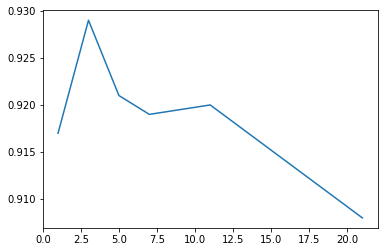

In [438]:
plt.plot(Ks, accuracies)

In [447]:
accuracies

[0.91700000000000004,
 0.92900000000000005,
 0.92100000000000004,
 0.91900000000000004,
 0.92000000000000004,
 0.90800000000000003]

#### The most optimal value appeared to be 3. That is because it takes enough nearest neigbours to compare with and get information from. But not too much to get to another clusters and blur borders between them. p.s. I also added weights to the counter in KNN.predict_one() so that those vectors with smaller distance had more influence on the final result.